# Analyze reference datasets and prepare them for training

### Importing the libraries we will be needing for our data analysis purpose

In [1]:
import pandas as pd
import numpy as np
import pickle
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

### Exploring different well-known activity datasets for reference; sensors worn at different locations of human being body (Arm, Pocket, Wrist, Belt, etc.)

In [2]:
def collect(i):
    x=pd.read_csv('data/dataset'+str(i)+'.csv',usecols=[1,2,3,4,5,6,10])
    return x.rename(columns={'Activity_Label':'Activity'})

In [3]:
columns = ['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Activity_Label']
df=collect(1) # The one we will really focus on
df2=collect(2)
df3=collect(3)
df4=collect(4)
df5=collect(5)
#I could have put them in an array but I prefer to go that way

### Digging into first dataset. What are the activities included ? How are they distributed ? etc.

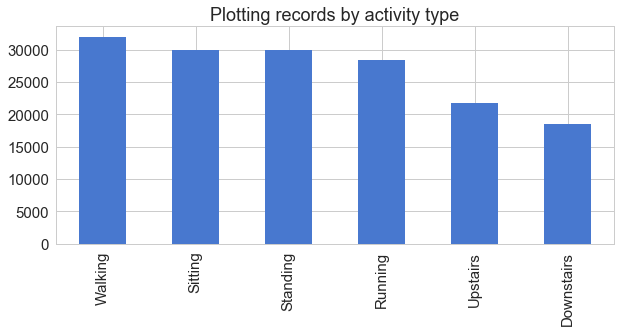

In [4]:
df['Activity'].value_counts().plot(kind='bar', title='Plotting records by activity type', figsize=(10, 4),align='center');

### Another dataset

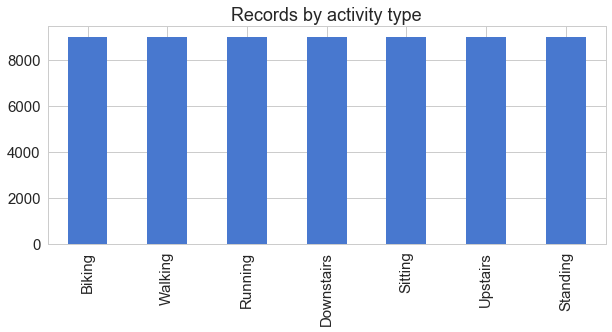

In [5]:
df4['Activity'].value_counts().plot(kind='bar', title='Records by activity type', figsize=(10, 4),align='center');

In [6]:
df4.head()

,Ax,Ay,Az,Gx,Gy,Gz,Activity
0,2.79220,-12.5720,-4.3177,0.021075,1.02990,1.22690,Walking
1,2.38360,-10.9920,-4.6037,0.201890,0.53573,1.32280,Walking
2,1.56630,-9.0848,-4.5764,0.287720,0.10049,1.20710,Walking
3,-0.61292,-8.5263,-2.9284,0.175930,-0.21441,0.90469,Walking
4,-1.18500,-9.3436,-2.2337,-0.033292,-0.48625,0.60720,Walking


### Another one

In [7]:
df5.head()

,Ax,Ay,Az,Gx,Gy,Gz,Activity
0,2.015811,6.101916,4.739881,-1.024116,-0.519541,-0.694248,Downstairs
1,2.247357,6.483285,4.562817,-0.850630,-0.415694,-0.847881,Downstairs
2,2.124774,7.000859,4.276789,-0.569937,-0.397368,-1.089478,Downstairs
3,1.893228,7.259646,4.167826,-0.400728,-0.555887,-1.230588,Downstairs
4,1.757025,7.613774,3.800077,-0.219301,-0.821919,-1.368033,Downstairs


### Generating a new feature to simplify acc/gyro graphical signal analysis : magnitude
magnitude(t)=sqrt(t.x^2 + t.y^2 + t.z^2) 

In [8]:
def magnitude(df):
    ax2 = df['Ax']**2
    ay2 = df['Ay']**2
    az2 = df['Az']**2
    am2 = ax2 + ay2 + az2
    
    gx2 = df['Gx']**2
    gy2 = df['Gy']**2
    gz2 = df['Gz']**2
    gm2 = gx2 + gy2 + gz2
    
    df['Am']=am2.apply(lambda x: math.sqrt(x))
    df['Gm']=gm2.apply(lambda x: math.sqrt(x))

### Applying magnitude on some of the collected datasets

In [9]:
magnitude(df)
magnitude(df2)
magnitude(df3)
magnitude(df4)
magnitude(df5)

In [10]:
df.head()

,Ax,Ay,Az,Gx,Gy,Gz,Activity,Am,Gm
0,-17.365944,19.517958,0.885323,-0.121868,2.177429,1.535715,Downstairs,26.140208,2.667297
1,-9.684067,13.933616,1.157730,-0.053145,-1.751656,1.254106,Downstairs,17.007855,2.154972
2,-4.045243,7.709117,-1.266692,-0.596510,-3.471853,1.176526,Downstairs,8.797669,3.714000
3,-1.770645,5.788648,-0.735499,-0.867734,-2.983771,0.893696,Downstairs,6.097916,3.233349
4,2.819412,3.963521,0.599295,-0.541227,-2.662762,0.328645,Downstairs,4.900790,2.737012


### Plotting utilities

In [11]:
def plot_activity(activity, df,i=1000):
    data = df[df['Activity'] == activity][['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']][:i]
    axis = data.plot(subplots=True, figsize=(16, 6), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
        
def plot_activity_magnitude(activity, df,i=1000):
    data = df[df['Activity'] == activity][['Am', 'Gm']][:i]
    axis = data.plot(subplots=True, figsize=(12, 4), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
        
def plot_datasets(df,i=1000):
    plot_activity("Walking", df,i)
    plot_activity("Standing", df,i)
    plot_activity("Sitting", df,i)
    plot_activity("Running", df,i)
    plot_activity("Upstairs", df,i)
    plot_activity("Downstairs", df,i)

def plot_datasets_magnitude(df,i=1000):
    plot_activity_magnitude("Walking", df,i)
    plot_activity_magnitude("Standing", df,i)
    plot_activity_magnitude("Sitting", df,i)
    plot_activity_magnitude("Running", df,i)
    plot_activity_magnitude("Upstairs", df,i)
    plot_activity_magnitude("Downstairs", df,i)

### Plotting reference datasets without magnitude

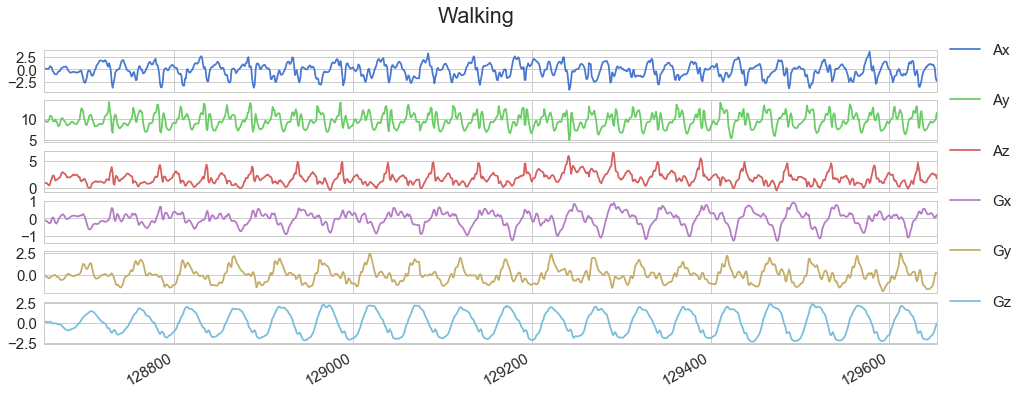

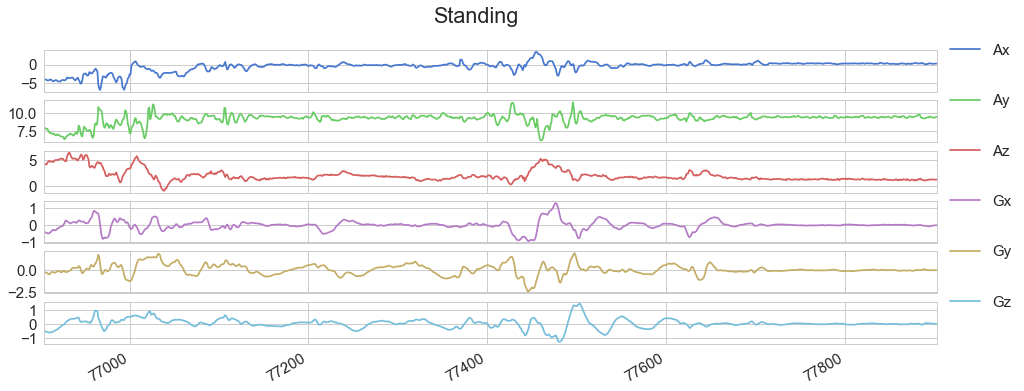

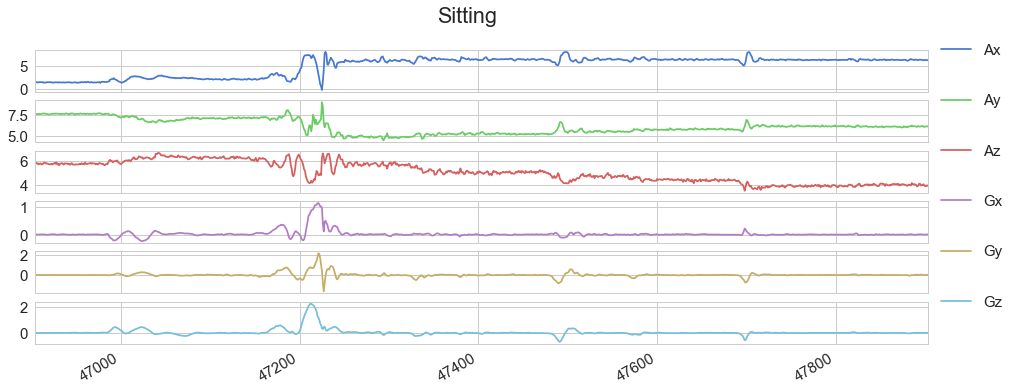

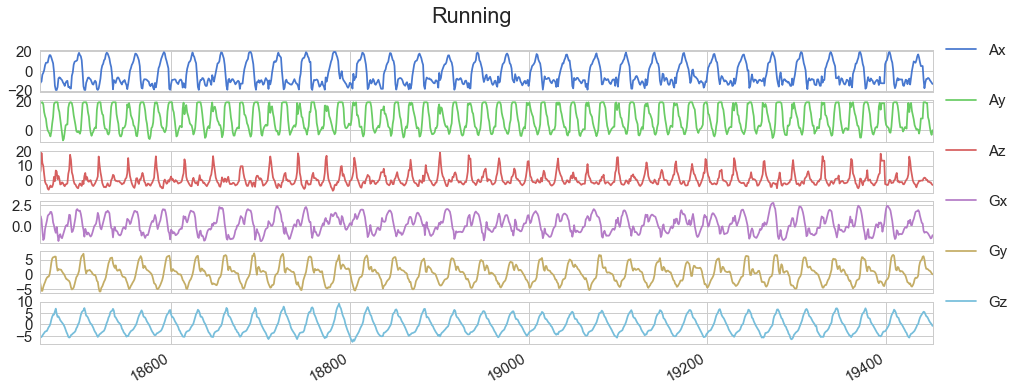

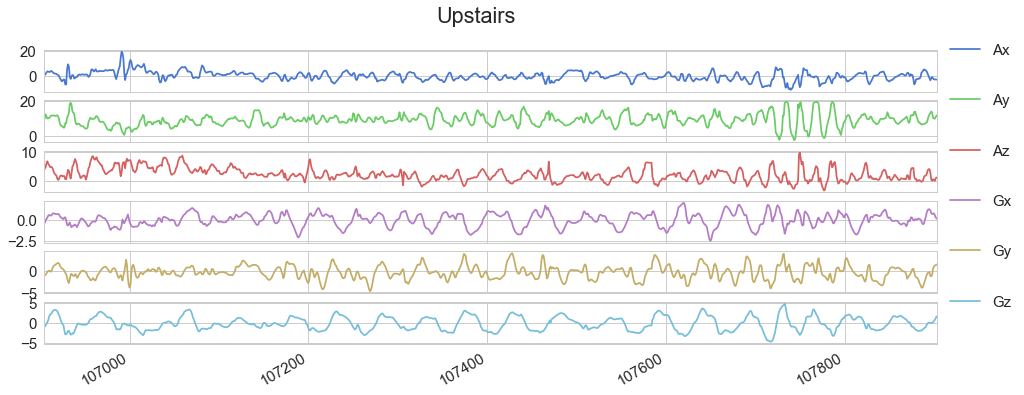

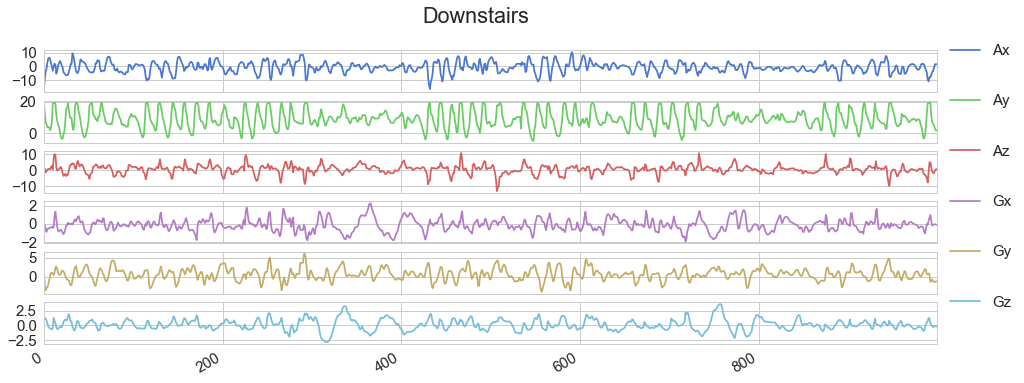

In [12]:
plot_datasets(df)

### Plotting reference datasets -  applying magnitude

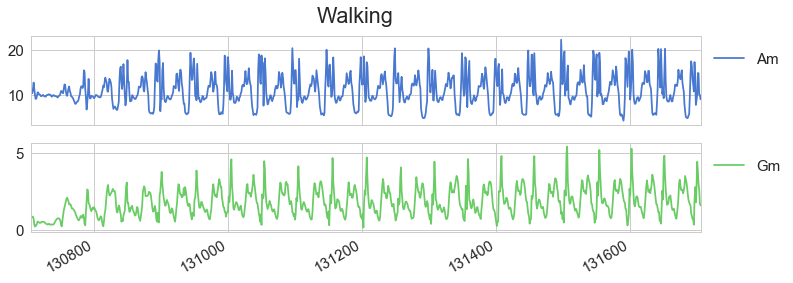

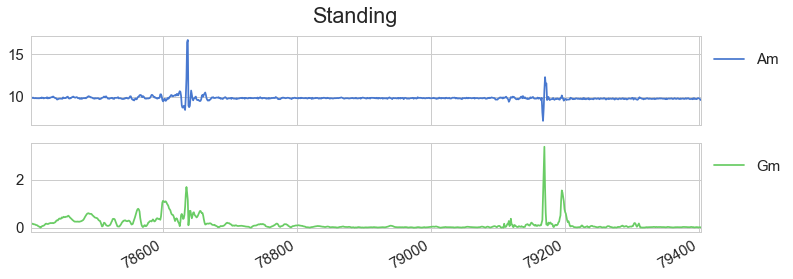

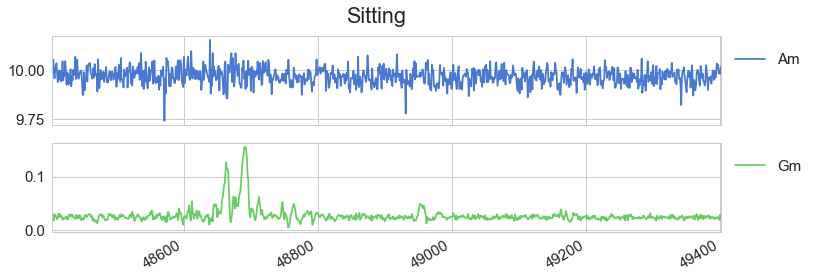

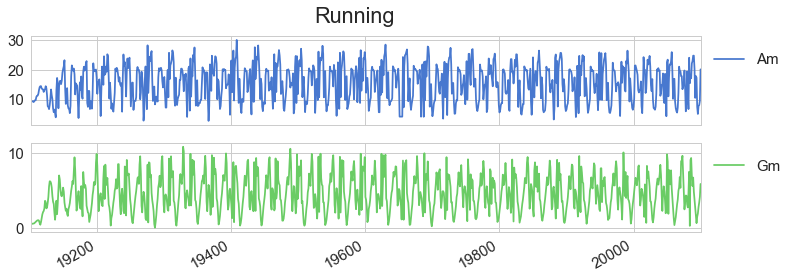

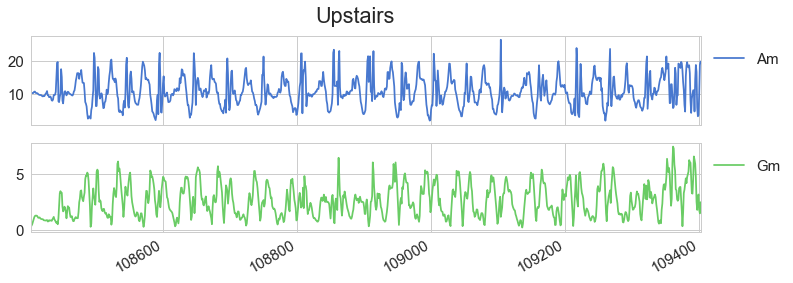

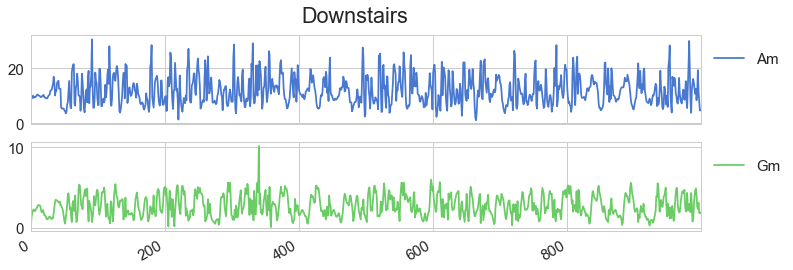

In [13]:
plot_datasets_magnitude(df3)

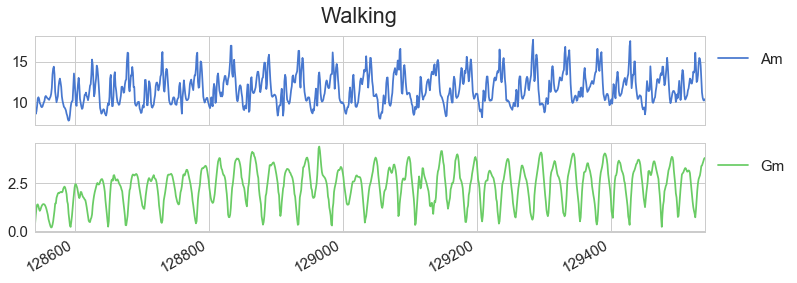

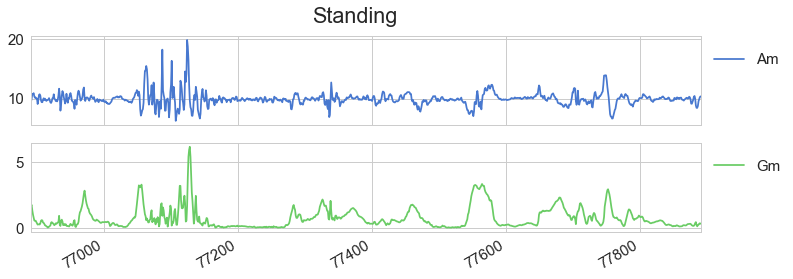

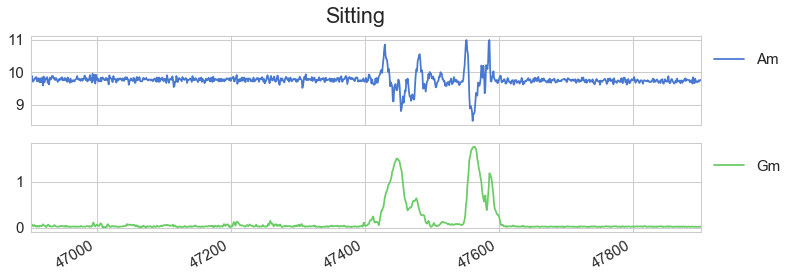

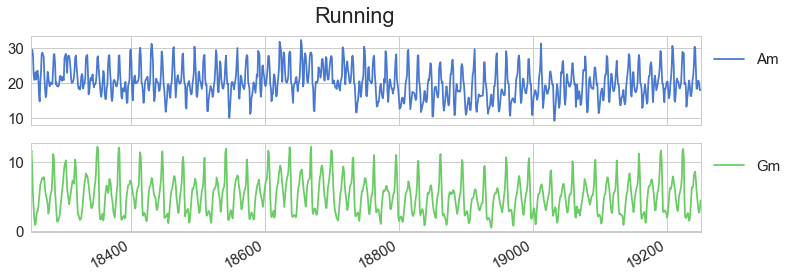

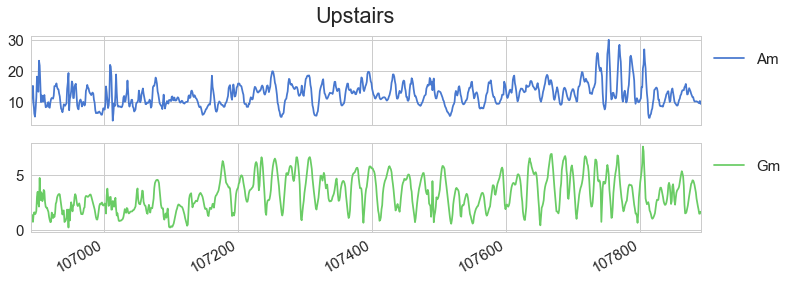

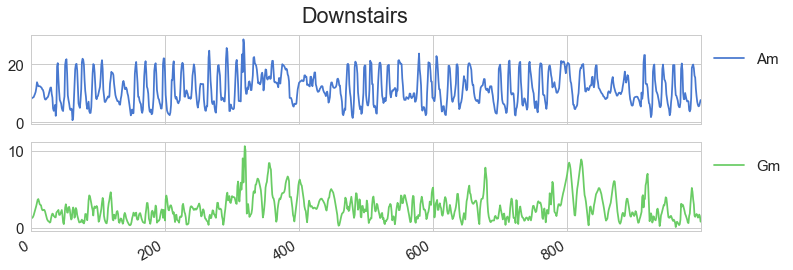

In [14]:
plot_datasets_magnitude(df5)

# Let's verify my statement that performances of the same activity have almost same variation over time, with a test dataset (Wearable 1 & Wearable 2). 

### Data collection

In [16]:
columns = ['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']
dfWear1 = pd.read_csv('data/wearable1.csv',usecols=[1,2,3,4,5,6])
dfWear2 = pd.read_csv('data/wearable2.csv',usecols=[1,2,3,4,5,6])
dfWear1 = dfWear1.dropna()
dfWear2 = dfWear2.dropna()
dfWear1.head()

,Ax,Ay,Az,Gx,Gy,Gz
0,-0.465820,0.709961,0.703125,-8.178711,9.216309,-4.577637
1,-0.495605,0.709961,0.716797,-3.845215,0.305176,-1.159668
2,-0.507812,0.682129,0.697266,-5.126953,-7.202148,2.746582
3,-0.474609,0.687012,0.666504,-2.929688,-10.864258,1.281738
4,-0.479004,0.709473,0.658691,-2.319336,-7.141113,0.854492


### Applying magnitude

In [17]:
magnitude(dfWear1)
magnitude(dfWear2)

In [18]:
def plot_activity2(df,i=1000):
    data = df[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']][:i]
    axis = data.plot(subplots=True, figsize=(16, 10))
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
        
def plot_activity_magnitude2(df,i=1000):
    data = df[['Am', 'Gm']][:i]
    axis = data.plot(subplots=True, figsize=(14, 5))
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

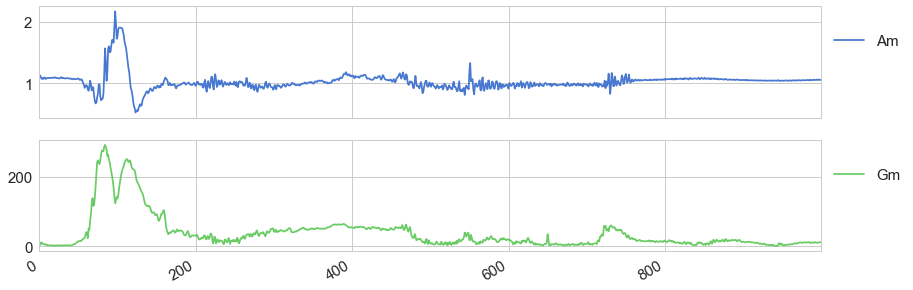

In [19]:
plot_activity_magnitude2(dfWear1)

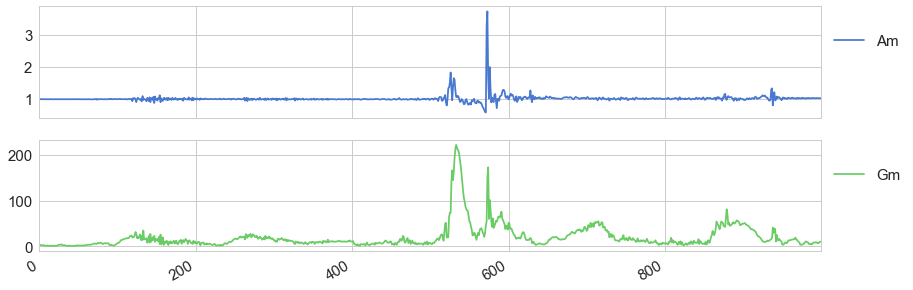

In [20]:
plot_activity_magnitude2(dfWear2)

## Some key observations after graphical comparisons

<p style="font-size:125%;"> After comparing the plotted Magnitude graph of the test dataset with our reference datasets graphs, we can see that the subject is in one of these two positions: sitting or standing. In other words, he is "immobile", doing some kind of passive activity.</p>

<p style="font-size:125%;"> We can then say that the Magnitude plotting has helped us eliminate the possibility of other activies.</p>

<p style="font-size:125%;"> Now, for a more accurate prediction, we will analyze the variation of the Acceleration and Gyroscope values where "Sitting" and "Standing" are involved.</p>
<p style="font-size:125%;"> To achieve that, we will consider the directions of the 3 axes in a sensor.</p>

<img src="axes.png" alt="Axes.png" style="width:424px;height:428px;" align="center">

### Sitting Activity in the training dataset

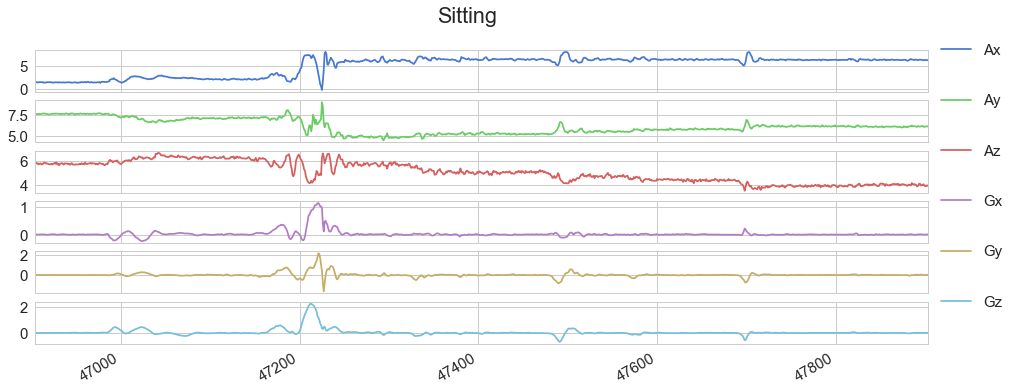

In [21]:
plot_activity("Sitting",df)

<ul style= "font-size:120%;">
    <li>Ay decreased before stabilizing...that means the subject is <strong>moving to a lower potential.</strong> </li>
    <li><strong>Gx, Gy, Gz values are ~0 </strong> during the sitting activity as opposed to when the subject is "Standing". And the sudden pick during the activity can be explained by the brief rotative movement performed in the transition movement leading to the sitting position (change of position).</li>
    <li>Az decreased...the subject is <strong>leaning backward.</strong></li>
    
<p style= "font-size:120%;"> All these observations confirm that the subject is indeed performing a "Sitting" activity.</p>
<p style= "font-size:120%;"> We may expect the same variations from our subject, if he is sitting.</p>

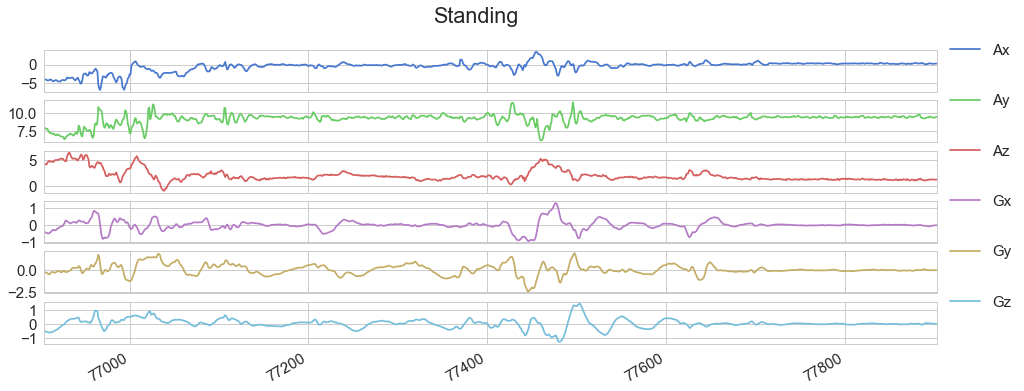

In [22]:
plot_activity("Standing",df)

<p style="font-size:120%;">Ay increasing significantly.. (Of course ! He is going to stand !)<br/>
Gx, Gy, Gz not stable...<br/>
</p>

### Now let's see if there is some analogy with our test dataset

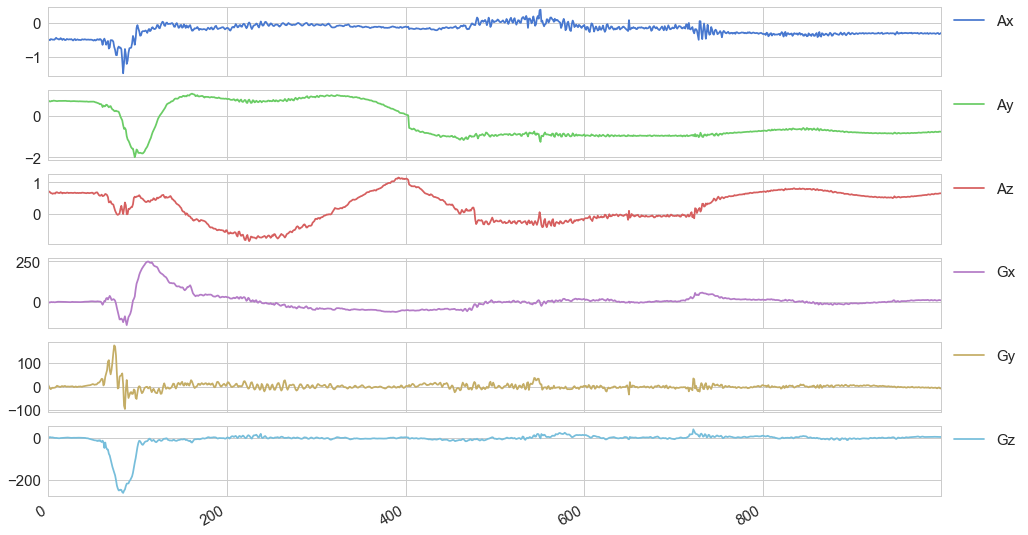

In [22]:
plot_activity2(dfWear1)

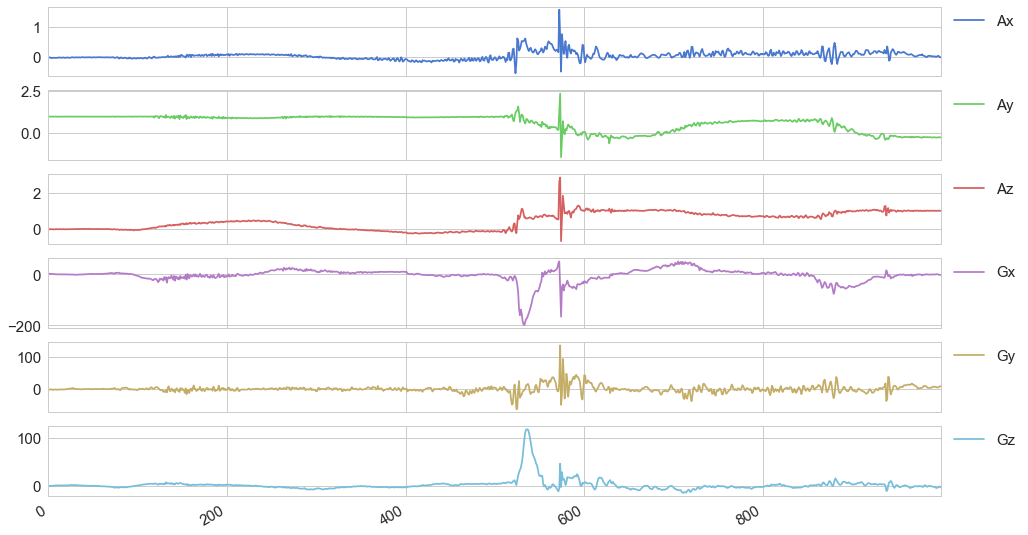

In [23]:
plot_activity2(dfWear2)

<ul style= "font-size:120%;">
<li>The two wearables captured a significant decrease in the Ay-axis values before stabilization.</li>
<li>The values of Gx,Gy,Gz have a similar variation with the one observed in the "Sitting" activity in the training set (quite stable around 0).</li>
</ul>
<p style="font-size:120%;">
Based on our previous analyzes of the reference datasets, we know this <strong>IS NOT</strong> a "Standing" activity. 
Instead, the signals have almost all the "Sitting" activity properties.<br/>
Therefore, we can with no doubt conclude that the subject is
<strong>performing a "Sitting" activity.</strong>
</p>

# We may therefore conclude that performances of the same activity almost lead to the same variation of axes values over time.
This is important to understand why and how a RNN brings a great level of accuracy and scale variance to our model, after applying convolutions. We also get, from a human eye, a glimpse of how these networks perform classification by looking for similarities in the attributes variations.